# 01 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 02 Import Dataframes

In [4]:
# Importing dataframe
path = r'C:\Users\vacgo\Documents\Achievement 6'
neighborhood_crime = pd.read_pickle(os.path.join(path, '02 Data', 'Cleaned Data', 'neighborhood_crime.pkl'))

In [6]:
neighborhood_crime.head()

,key,neighborhood,district,year,crimes_total,robbery,street_handbag_robbery,physical_injuries_total,dangerous_serious_bodily_harm,dep_of_liberty_coercion_threats_stalking,...,theft_of_motor_vehicles,theft_parts_motor_vehicles,bike_theft,res_burglarly,arson_offense_total,arson,prop_damage_total,prop_damage_graffiti,drugs,neighborhood_offence
1,11001,Tiergarten Sued,Mitte,2013,36863,557,366,3522,1106,801,...,99,2501,984,473,99,30,1677,152,732,6511
2,11002,Regierungsviertel,Mitte,2013,75823,472,204,5213,1384,1330,...,193,3014,2349,354,43,11,3701,1620,622,8903
3,11003,Alexanderplatz,Mitte,2013,36892,382,228,2773,724,631,...,160,1378,1673,583,81,35,2416,888,1007,5739
4,11004,Brunnenstrasse Sued,Mitte,2013,16464,120,34,812,184,237,...,372,861,1294,515,23,11,1429,632,259,3618
5,12005,Moabit West,Mitte,2013,15223,205,98,1349,357,541,...,166,980,766,324,103,28,1169,208,460,3030


In [8]:
neighborhood_crime.shape

(1440, 21)

# 03 Data Cleaning

In [11]:
neighborhood_crime.isnull().sum()

key                                         0
neighborhood                                0
district                                    0
year                                        0
crimes_total                                0
robbery                                     0
street_handbag_robbery                      0
physical_injuries_total                     0
dangerous_serious_bodily_harm               0
dep_of_liberty_coercion_threats_stalking    0
theft_total                                 0
theft_of_motor_vehicles                     0
theft_parts_motor_vehicles                  0
bike_theft                                  0
res_burglarly                               0
arson_offense_total                         0
arson                                       0
prop_damage_total                           0
prop_damage_graffiti                        0
drugs                                       0
neighborhood_offence                        0
dtype: int64

C:\Users\vacgo\AppData\Local\Temp\ipykernel_28840\2300511189.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neighborhood_crime['drugs'], bins=25) # Shows extreme values


<Axes: xlabel='drugs', ylabel='Density'>

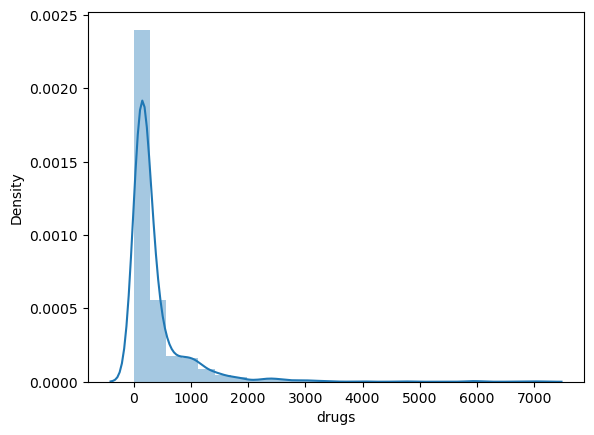

In [17]:
sns.distplot(neighborhood_crime['drugs'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [19]:
neighborhood_crime['drugs'].describe()

count    1440.000000
mean      372.624306
std       576.800807
min         0.000000
25%       108.000000
50%       185.000000
75%       357.000000
max      7074.000000
Name: drugs, dtype: float64

In [55]:
# Calculate Q1, Q3, and IQR
Q1 = neighborhood_crime['drugs'].quantile(0.25)
Q3 = neighborhood_crime['drugs'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
upper_bound = Q3 + 1.5 * IQR

In [57]:
upper_bound # for drugs column

730.5

C:\Users\vacgo\AppData\Local\Temp\ipykernel_28840\3165286393.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neighborhood_crime['physical_injuries_total'], bins=25) # Shows extreme values


<Axes: xlabel='physical_injuries_total', ylabel='Density'>

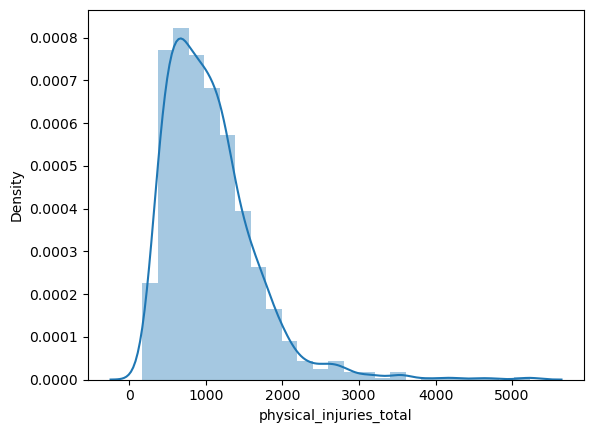

In [49]:
sns.distplot(neighborhood_crime['physical_injuries_total'], bins=25) # Shows extreme values

In [51]:
neighborhood_crime['physical_injuries_total'].describe()

count    1440.000000
mean     1055.936111
std       592.570509
min       169.000000
25%       636.750000
50%       952.500000
75%      1313.250000
max      5230.000000
Name: physical_injuries_total, dtype: float64

In [59]:
# Calculate Q1, Q3, and IQR
Q1_phys = neighborhood_crime['physical_injuries_total'].quantile(0.25)
Q3_phys = neighborhood_crime['physical_injuries_total'].quantile(0.75)
IQR_phys = Q3_phys - Q1_phys

# Define the outlier boundaries
upper_bound_phys = Q3_phys + 1.5 * IQR_phys

In [61]:
upper_bound_phys

2328.0

### There are quite a number of outliers for drug offenses, one exceeding 7000. I will keep it for now

### I will be exploring drugs and neighborhood_offence columns, and probably physical_injuries_total, since these are the things that I am most worried about when looking at the neighborhoods in Berlin. And this is a subset of the crimes that directly affect the quality of life in the neighborhood. Note: neighborhood offence column refers to the following (from Polizei Berlin website)

#### Key Aspects Considered for Defining Neighborhood-Related Crimes:
-Close spatial connection between the crime scene and the residence of the suspect.

-Crimes involving domestic violence, including bodily harm, coercion, and threats.

-Neglect indicators, such as acts of destruction or vandalism.

-An observable lack of respect for government authority.

# 04 Data Prep

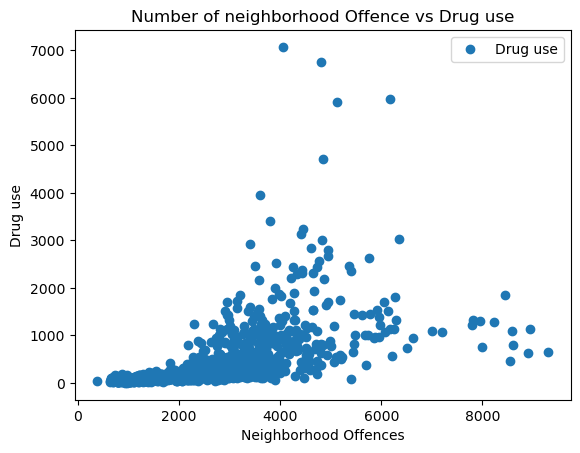

In [73]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

neighborhood_crime.plot(x = 'neighborhood_offence', y='drugs',style='o', label='Drug use') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of neighborhood Offence vs Drug use')  
plt.xlabel('Neighborhood Offences')  
plt.ylabel('Drug use')
plt.legend()
plt.show()

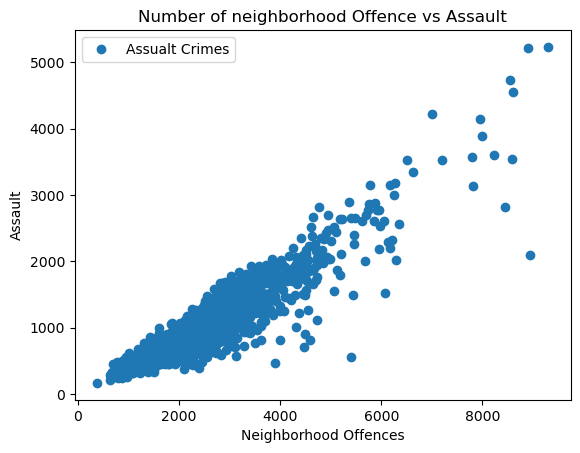

In [75]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

neighborhood_crime.plot(x = 'neighborhood_offence', y='physical_injuries_total',style='o', label='Assualt Crimes') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of neighborhood Offence vs Assault')  
plt.xlabel('Neighborhood Offences')  
plt.ylabel('Assault')
plt.legend()
plt.show()

### Hypothesis 1: As the number of drug use increases, neighborhood offences also increase
### Hypothesis 2: As the number of assault increases, neighborhood offences also increase

In [77]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = neighborhood_crime['neighborhood_offence'].values.reshape(-1,1)
y1 = neighborhood_crime['drugs'].values.reshape(-1,1)

In [79]:
X1

array([[6511],
       [8903],
       [5739],
       ...,
       [2806],
       [2643],
       [2952]], dtype=int64)

In [81]:
y1

array([[ 732],
       [ 622],
       [1007],
       ...,
       [ 556],
       [ 500],
       [ 446]], dtype=int64)

In [83]:
y2 = neighborhood_crime['physical_injuries_total'].values.reshape(-1,1)

In [85]:
y2

array([[3522],
       [5213],
       [2773],
       ...,
       [1149],
       [1044],
       [1162]], dtype=int64)

In [87]:
# Split data into a training set and a test set for neighborhood_offence vs drugs

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [89]:
# Split data into a training set and a test set for neighborhood_offence vs physical_injuries_total

X1_train, X1_test, y2_train, y2_test = train_test_split(X1, y2, test_size=0.3, random_state=0)

# 05 Regression Analysis

In [106]:
# Create a regression object.

regression1 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [98]:
regression2 = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [116]:
# Fit the regression object onto the training set for Drug use.

regression1.fit(X1_train, y1_train)

LinearRegression()

In [118]:
# Fit the regression object onto the training set for Physical Injury.

regression2.fit(X1_train, y2_train)

LinearRegression()

In [120]:
# Predict the values of y using X for Drug use.

y1_predicted = regression1.predict(X1_test)

In [122]:
# Predict the values of y using X for Physical Injuries.

y2_predicted = regression2.predict(X1_test)

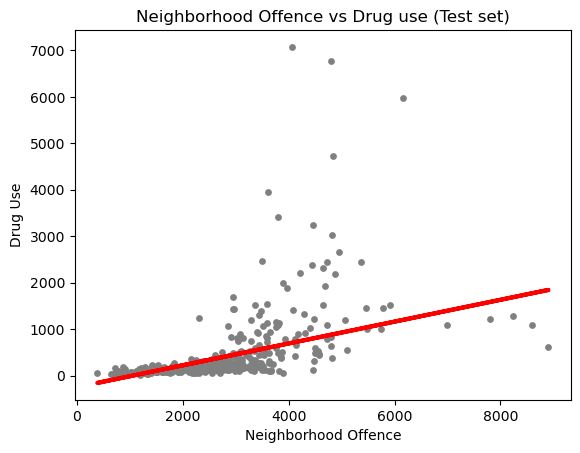

In [112]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X1_test, y1_test, color='gray', s = 15)
plot_test.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test.title('Neighborhood Offence vs Drug use (Test set)')
plot_test.xlabel('Neighborhood Offence')
plot_test.ylabel('Drug Use')
plot_test.show()

### We can see that there is a positive correlation on the neighborhood offence vs drug use. The slope of the regression line is not that steep, but still indicates a relatively high correlation (from the earlier test in Task 6.2, it is 0.79). However there are a lot of extreme values for drug use that might affect the regression. Nevertheless, it still shows that the more drug use, the more neighborhood offence.

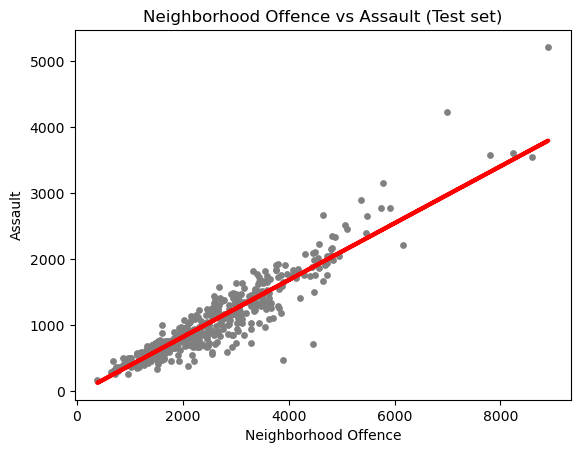

In [124]:
# Create a plot that shows the regression line from the model on the test set.

plot_test2 = plt
plot_test2.scatter(X1_test, y2_test, color='gray', s = 15)
plot_test2.plot(X1_test, y2_predicted, color='red', linewidth =3)
plot_test2.title('Neighborhood Offence vs Assault (Test set)')
plot_test2.xlabel('Neighborhood Offence')
plot_test2.ylabel('Assault')
plot_test2.show()

## We can see that the slope of the regression line is steeper, showing a very strong positive correlation between assault and neighborhood offence. This is much stronger case compared to drugs.

In [184]:
# Create objects that contain the model summary statistics.

rmse1 = mean_squared_error(y1_test, y1_predicted) # This is the mean squared error for drugs
r2_1 = r2_score(y1_test, y1_predicted) # This is the R2 score for drugs. 

In [186]:
rmse2 = mean_squared_error(y2_test, y2_predicted) # This is the mean squared error for assault
r2_2 = r2_score(y2_test, y2_predicted) # This is the R2 score for assault. 

In [188]:
# Print the model summary statistics for drugs. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse1)
print('R2 score: ', r2_1)

Slope: [[0.23489128]]
Mean squared error:  447985.66904912173
R2 score:  0.2535158278983246


In [190]:
# Print the model summary statistics for assault. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r2_2)

Slope: [[0.23489128]]
Mean squared error:  51422.215543812
R2 score:  0.8605497638167585


In [140]:
y1_predicted

array([[ 593.52002848],
       [  90.38290975],
       [ 395.03689808],
       [ 807.74087455],
       [ 825.59261172],
       [ 819.95522103],
       [ 225.68028622],
       [ 535.26699139],
       [ 334.4349482 ],
       [ 375.54092195],
       [ 380.70853008],
       [ 406.07678817],
       [ 734.21990435],
       [ 294.03364828],
       [ 377.65494346],
       [ 358.86364117],
       [1395.20396229],
       [ 463.39026014],
       [ 880.32227963],
       [ 843.91413145],
       [ 580.60100816],
       [ 215.34506996],
       [ 577.31253026],
       [ 475.83949791],
       [ 294.50343084],
       [ 133.13312245],
       [ 434.96841543],
       [ 566.977314  ],
       [ -42.33066265],
       [ 533.15296988],
       [ 315.17386336],
       [  20.15041745],
       [  91.08758359],
       [ 705.32827708],
       [  83.10128012],
       [ 387.52037716],
       [  99.07388706],
       [ 214.40550484],
       [ 521.40840595],
       [ 150.04529451],
       [ 463.8600427 ],
       [ 539.260

In [142]:
y2_predicted

array([[1499.97646399],
       [ 576.85967747],
       [1135.81507995],
       [1893.01218261],
       [1925.76515916],
       [1915.42211394],
       [ 825.09276292],
       [1393.09832997],
       [1024.62734376],
       [1100.04538187],
       [1109.52650667],
       [1156.07021019],
       [1758.12163444],
       [ 950.5021863 ],
       [1103.92402383],
       [1069.44720641],
       [2970.84368731],
       [1261.22450333],
       [2026.17888991],
       [1959.38005615],
       [1476.27365201],
       [ 806.13051334],
       [1470.24020896],
       [1284.06539487],
       [ 951.36410674],
       [ 655.29443711],
       [1209.07831698],
       [1451.27795937],
       [ 333.36715442],
       [1389.21968801],
       [ 989.2886059 ],
       [ 448.00257235],
       [ 578.15255813],
       [1705.11352765],
       [ 563.49991072],
       [1122.02435298],
       [ 592.80520553],
       [ 804.40667247],
       [1367.67167712],
       [ 686.32357279],
       [1262.08642376],
       [1400.424

In [144]:
# Create a dataframe comparing the actual and predicted values of y for drugs.

data1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data1.head(30)

,Actual,Predicted
0,803,593.520028
1,208,90.382910
2,245,395.036898
3,489,807.740875
4,461,825.592612
5,522,819.955221
6,193,225.680286
7,525,535.266991
8,251,334.434948
9,218,375.540922


In [146]:
# Create a dataframe comparing the actual and predicted values of y for assault.

data2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data2.head(30)

,Actual,Predicted
0,1536,1499.976464
1,661,576.859677
2,1364,1135.815080
3,1759,1893.012183
4,1856,1925.765159
5,2015,1915.422114
6,952,825.092763
7,1312,1393.098330
8,945,1024.627344
9,901,1100.045382


## How regression fits in the training set

In [151]:
# Predict for drugs.

y1_predicted_train = regression1.predict(X1_train) # This is predicting X1_train!

In [192]:
rmse3 = mean_squared_error(y1_train, y1_predicted_train)
r2_3 = r2_score(y1_train, y1_predicted_train)

In [194]:
print('Slope:' ,regression1.coef_)
print('Mean squared error: ', rmse3)
print('R2 score: ', r2_3)

Slope: [[0.23489128]]
Mean squared error:  129831.06918515636
R2 score:  0.3961553857241089


In [153]:
# Predict for assault.

y2_predicted_train = regression2.predict(X1_train) # This is predicting X1_train!

In [196]:
rmse4 = mean_squared_error(y2_train, y2_predicted_train)
r2_4 = r2_score(y2_train, y2_predicted_train)

In [204]:
print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse4)
print('R2 score: ', r2_4)

Slope: [[0.43096022]]
Mean squared error:  55875.97593244632
R2 score:  0.8369046681610742


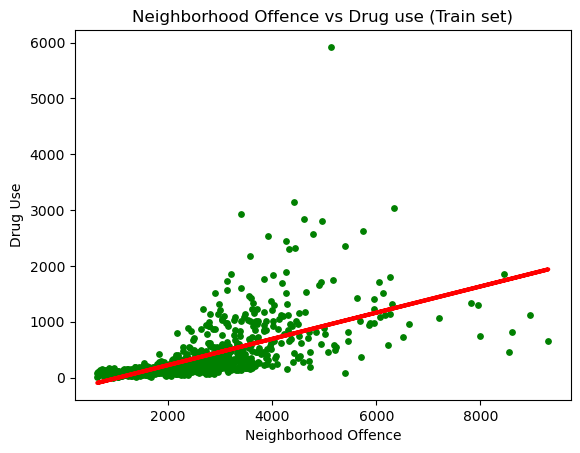

In [200]:
# Visualizing the training set results.

plot_test3 = plt
plot_test3.scatter(X1_train, y1_train, color='green', s = 15)
plot_test3.plot(X1_train, y1_predicted_train, color='red', linewidth =3)
plot_test3.title('Neighborhood Offence vs Drug use (Train set)')
plot_test3.xlabel('Neighborhood Offence')
plot_test3.ylabel('Drug Use')
plot_test3.show()

### Removing Outliers in Drugs to check

In [165]:
# Clean the extreme values from the "drugs" variable observed during the consistency checks.

df_test = neighborhood_crime[neighborhood_crime['drugs'] <=2328] 

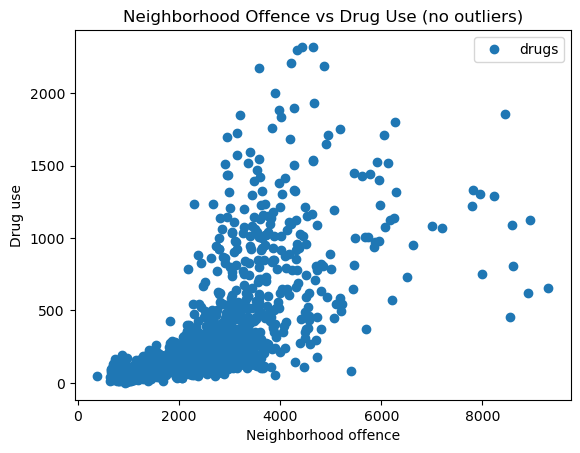

In [167]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'neighborhood_offence', y='drugs', style='o')  
plt.title('Neighborhood Offence vs Drug Use (no outliers)')  
plt.xlabel('Neighborhood offence')  
plt.ylabel('Drug use')  
plt.show()

In [169]:
# Reshape again.

X_3 = df_test['neighborhood_offence'].values.reshape(-1,1)
y_3 = df_test['drugs'].values.reshape(-1,1)

In [171]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

In [173]:
# Run and fit the regression.

regression3 = LinearRegression()  
regression3.fit(X3_train, y3_train)

LinearRegression()

In [176]:
# Predict.

y3_predicted = regression3.predict(X3_test)

In [206]:
rmse5 = mean_squared_error(y3_test, y3_predicted)
r2_5 = r2_score(y3_test, y3_predicted)

In [208]:
print('Slope:' ,regression3.coef_)
print('Mean squared error: ', rmse5)
print('R2 score: ', r2_5)

Slope: [[0.20341551]]
Mean squared error:  70158.62630589484
R2 score:  0.46209600610822443


In [210]:
# Print the model summary statistics for drugs (with outlier). This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse1)
print('R2 score: ', r2_1)

Slope: [[0.23489128]]
Mean squared error:  447985.66904912173
R2 score:  0.2535158278983246


### There is a significant improvement in the R2 values when we removed the outliers

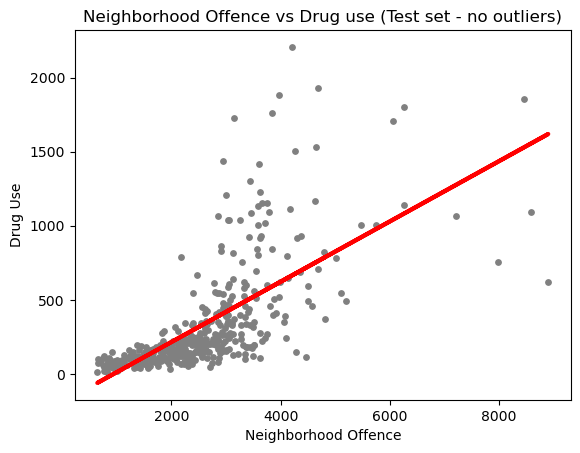

In [213]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X3_test, y3_test, color='gray', s = 15)
plot_test.plot(X3_test, y3_predicted, color='red', linewidth =3)
plot_test.title('Neighborhood Offence vs Drug use (Test set - no outliers)')
plot_test.xlabel('Neighborhood Offence')
plot_test.ylabel('Drug Use')
plot_test.show()

In [215]:
data3 = pd.DataFrame({'Actual': y3_test.flatten(), 'Predicted': y3_predicted.flatten()})
data3.head(30)

,Actual,Predicted
0,94,301.875551
1,1505,677.583992
2,117,368.392422
3,422,346.423547
4,43,127.751877
5,56,164.570084
6,421,392.192036
7,272,283.974987
8,205,210.338573
9,96,195.082410


# Insights

## In the drug vs neighborhood offences correlation, we can see a positive correlation albeit weak one. The Mean Square Error is far apart between test and train, and therefore the model may not be a good one to generalize this relationship. However, the assault vs neighborhood offense show a better correlation and has closer values of the MSE for both test and train which suggests good model for the relationship. While both hypothesis can still be true (a weaker one for the drugs), the result might be suggesting to me that I should worry more about assault than high drug use if the neighborhood offence is high.